In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc(
    "figure", figsize=(12, 8)
)
# from tqdm.autonotebook import tqdm
from tqdm import tqdm

In [9]:
plt.style.use('ggplot')

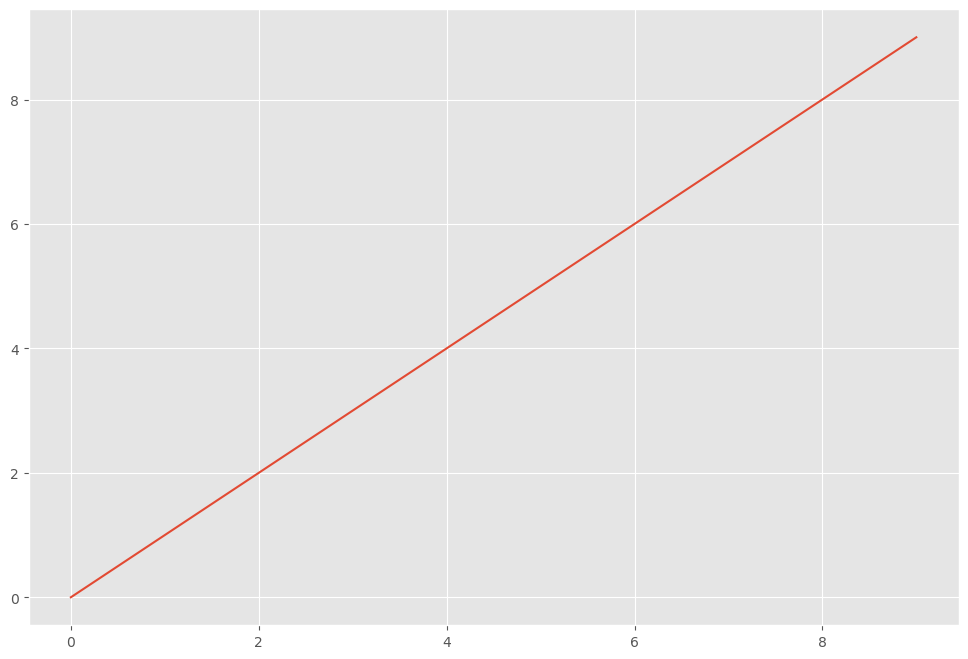

In [10]:
plt.plot(np.arange(10))

In [11]:
import os

In [15]:
# os.system('g++ -std=c++14 number_of_tests_exp.cpp -o number_of_tests_exp && ./number_of_tests_exp 15 10')
res = os.system('cd "/home/amir/cpp_projects/korotin/3_sem/laba2/" && g++ -std=c++14 number_of_tests_exp.cpp -o number_of_tests_exp && "/home/amir/cpp_projects/korotin/3_sem/laba2/"number_of_tests_exp 15 10')
# print(res*10)

0.06666667014


## Number of experiments changing

In [40]:
import subprocess

batcmd='cd "/home/amir/cpp_projects/korotin/3_sem/laba2/" && g++ -std=c++14 number_of_tests_exp.cpp -o number_of_tests_exp && "/home/amir/cpp_projects/korotin/3_sem/laba2/"number_of_tests_exp 15 10'
result = subprocess.check_output(batcmd, shell=True)
print(float(result))
print(subprocess.check_output(f'g++ -std=c++14 number_of_tests_exp.cpp -o number_of_tests_exp', shell=True))
def run_experiment(n_of_exps, seed):
    return float(subprocess.check_output(f"./number_of_tests_exp {n_of_exps} {seed}", shell=True))
run_experiment(10, 10)

0.06666667014
b''


0.0

100%|██████████| 2100/2100 [00:01<00:00, 1562.11it/s]


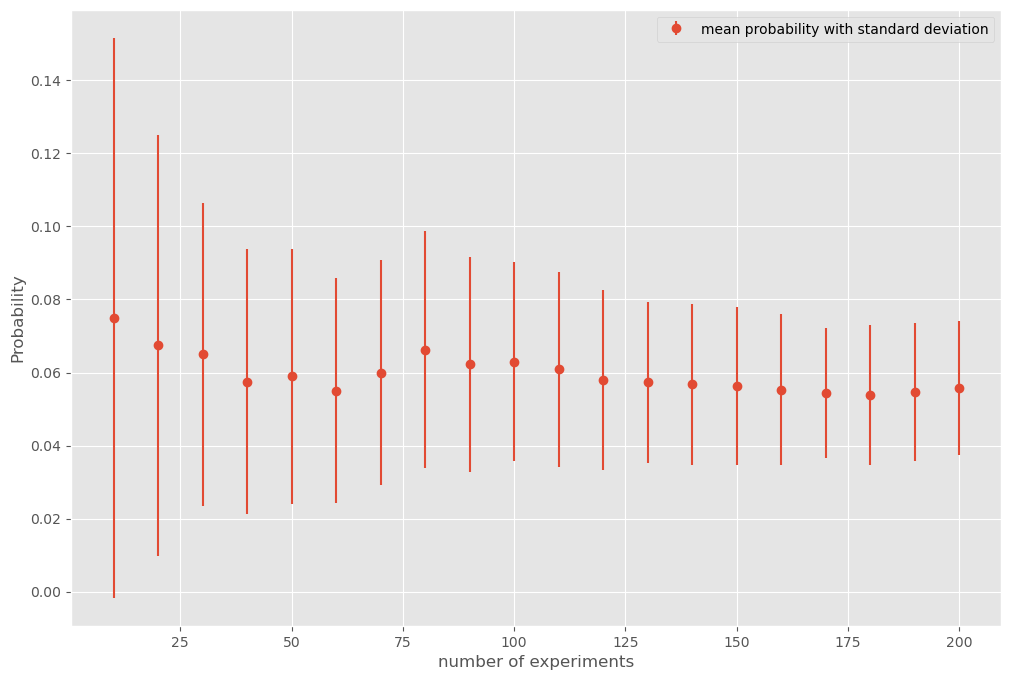

In [49]:
N = 20 # number of repetitions
x = list(range(10, 201, 10))
y = []
yerr = []
with tqdm(total=np.sum(x)) as pbar: 
    for n_of_exps in x:
        res = []
        for i in range(N):
            res.append(run_experiment(n_of_exps, i))
        res = np.array(res)
        y.append(res.mean())
        yerr.append(np.sqrt(np.mean((res-res.mean())**2)))
        pbar.update(n_of_exps)

plt.errorbar(x, y, fmt='o', yerr=yerr, label='mean probability with standard deviation')
plt.legend()
plt.xlabel("number of experiments")
plt.ylabel("Probability")
plt.show()

Text(0, 0.5, '1/yerr^2')

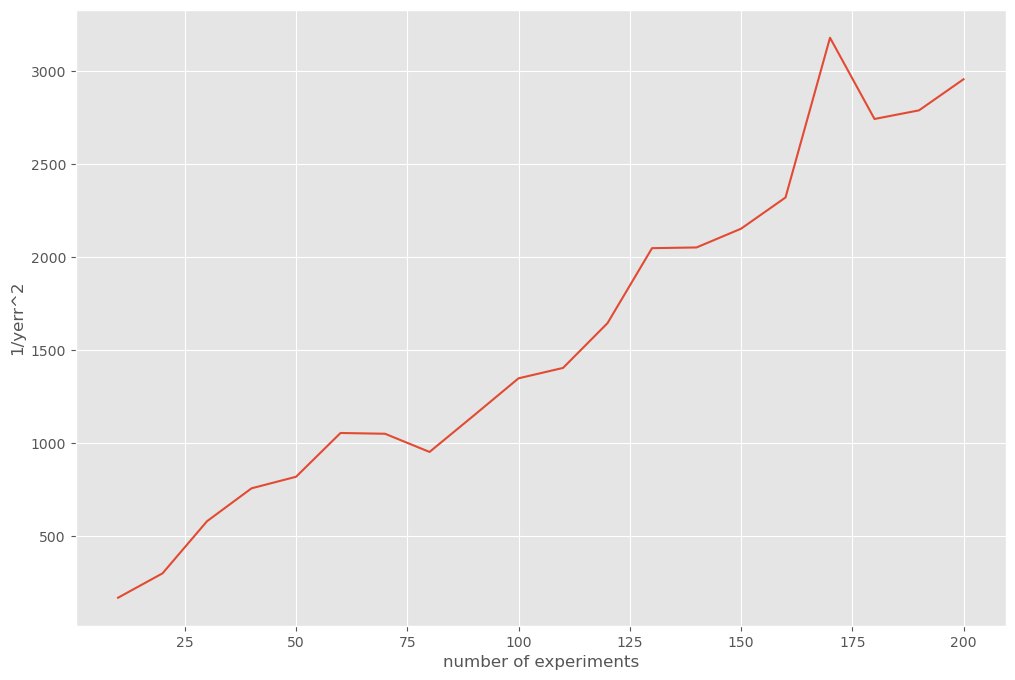

In [55]:
plt.plot(x, (1/np.array(yerr))**2)
plt.xlabel("number of experiments")
plt.ylabel("1/yerr^2")

Этот график показвает, что отклонение вероятности пропорциональна $\frac{1}{\sqrt{n}}$.

Также вероятность сходится к теоретическому предсказанию 0.05 (для моих параметров).